--- Training the model ---
Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.2943 - loss: 1.9388 - val_accuracy: 0.3283 - val_loss: 1.8673
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3724 - loss: 1.7544 - val_accuracy: 0.3864 - val_loss: 1.7170
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.3995 - loss: 1.6836 - val_accuracy: 0.4046 - val_loss: 1.6553
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4143 - loss: 1.6383 - val_accuracy: 0.4185 - val_loss: 1.6209
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4275 - loss: 1.6029 - val_accuracy: 0.4247 - val_loss: 1.5990
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4380 - loss: 1.5756 - val_accuracy: 0.4150 - val_loss: 1.6464
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4464 - loss: 1.5504 - val_accuracy: 0.4470 - val_loss: 1.5404
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/ste

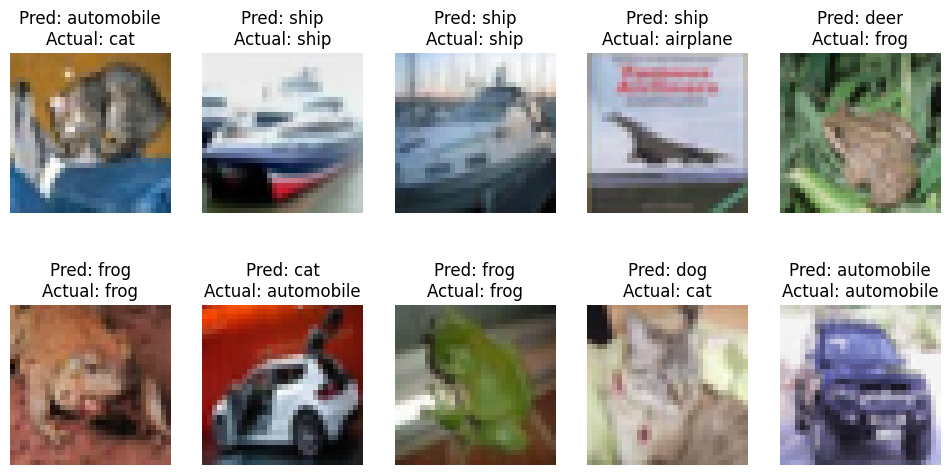

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Preprocess the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values from 0-255 to 0.0-1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# 2. Define the FNN Model Architecture (from your notebook)
model = Sequential([
    # Flatten the 32x32x3 images into a 1D array
    Flatten(input_shape=(32, 32, 3)),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# 3. Compile the Model
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',  # Use this for integer labels
    metrics=['accuracy']
)

# 4. Train the Model
print("--- Training the model ---")
# We use fewer epochs here as FNNs don't learn this task well
model.fit(
    x_train, 
    y_train, 
    epochs=15, # Reduced from 30 for a minimal run
    validation_data=(x_test, y_test),
    verbose=1
)

# 5. Evaluate the Model's Overall Accuracy
print("\n--- Evaluating on test data ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nOverall Test accuracy: {test_acc*100:.2f}% (Note: Low accuracy is expected for an FNN on CIFAR-10)")

# 6. Test and Display 10 Sample Predictions
print("\n--- Displaying individual predictions ---")

# Get predictions for the first 10 images in the test set
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Get the actual labels (and flatten the array for easier use)
actual_labels = y_test[:10].flatten()

# Set up a 2x5 grid to display the images
plt.figure(figsize=(12, 6))
for i in range(10):
    # Create a subplot
    plt.subplot(2, 5, i + 1)
    
    # Display the color image
    plt.imshow(x_test[i])
    
    # Set the title with the prediction and the actual label
    pred_name = class_names[predicted_labels[i]]
    actual_name = class_names[actual_labels[i]]
    plt.title(f"Pred: {pred_name}\nActual: {actual_name}")
    
    # Hide the axes
    plt.axis('off')

